In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings


In [11]:
# load the customer data into a DataFrame
customer_df = pd.read_csv('customer_data.csv')

# Check the first 5 rows
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Check for null values
customer_df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
relevant_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

customer_df = customer_df[relevant_cols]

In [14]:
customer_df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(customer_df)

scaled_data = scaler.transform(customer_df)

In [16]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):
        kmeans_model = KMeans(n_clusters=k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

In [17]:
def generate_elbow_plot(clusters_centers, k_values):
    figure = plt.subplots(figsize=(12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color='orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

/Users/christopherlomeli/anaconda3/envs/ml_sandbox/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/christopherlomeli/anaconda3/envs/ml_sandbox/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/christopherlomeli/anaconda3/envs/ml_sandbox/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/christopherlomeli/anaconda3/envs/ml_sandbox/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

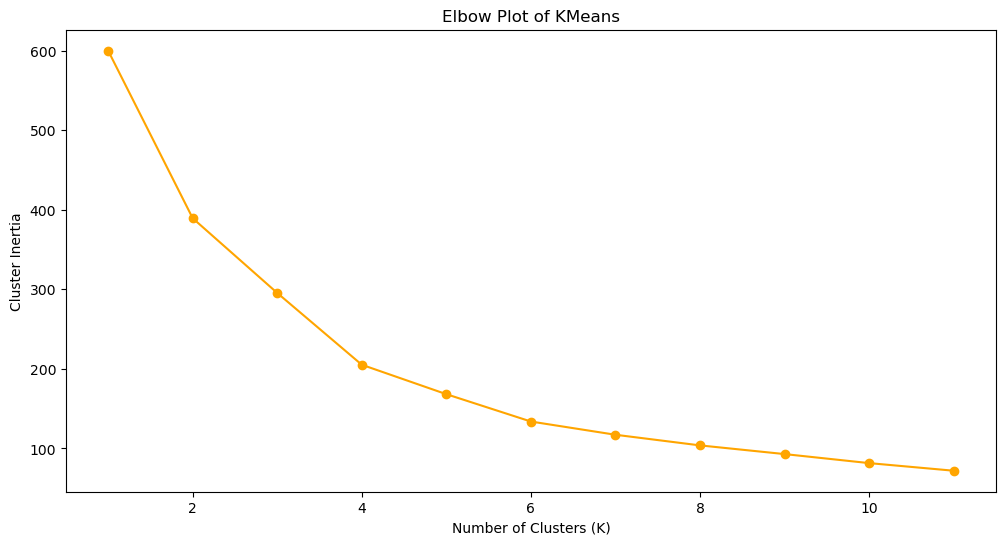

In [18]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

generate_elbow_plot(clusters_centers, k_values)

In [20]:
kmeans_model = KMeans(n_clusters=5)
kmeans_model.fit(scaled_data)


/Users/christopherlomeli/anaconda3/envs/ml_sandbox/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [21]:
customer_df["clusters"] = kmeans_model.labels_
customer_df.head()

,Age,Annual Income (k$),Spending Score (1-100),clusters
0,19,15,39,3
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,3


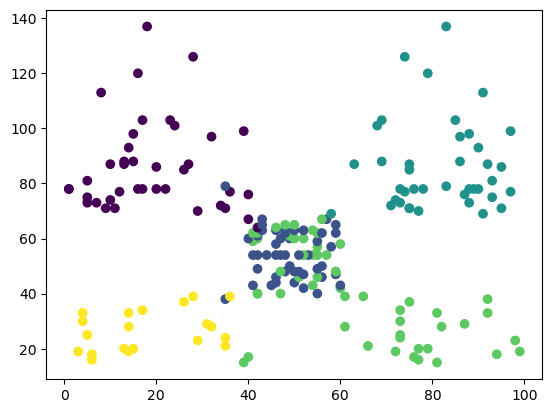

In [22]:
plt.scatter(customer_df["Spending Score (1-100)"],
            customer_df["Annual Income (k$)"],
            c=customer_df["clusters"])